In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("Attrition data (1).csv")
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [13]:
print(f"Total columns-",len(df.columns))
print(f"Total Entries-", df.size)

Total columns- 29
Total Entries- 127890


In [14]:
df.shape

(4410, 29)

<Axes: >

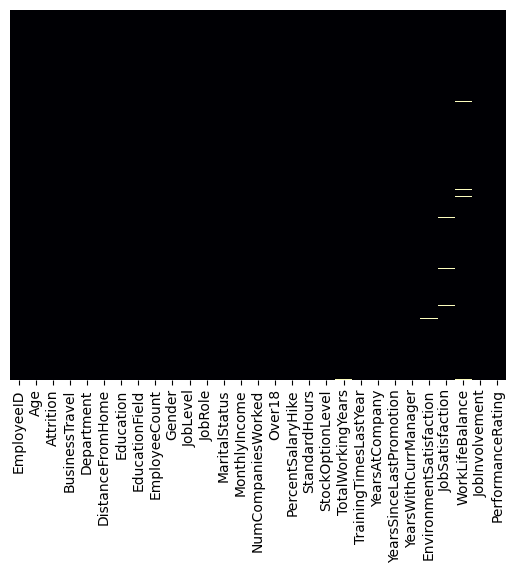

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [21]:
print(df.isnull().sum())
print()
print(df.isna().sum())

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel            

In [22]:
print(df.isnull().sum().sum())
print()
print(df.isna().sum().sum())

111

111


In [23]:
df=df.dropna(axis=0)

In [24]:
df.shape

(4300, 29)

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   Age                      4300 non-null   int64  
 2   Attrition                4300 non-null   object 
 3   BusinessTravel           4300 non-null   object 
 4   Department               4300 non-null   object 
 5   DistanceFromHome         4300 non-null   int64  
 6   Education                4300 non-null   int64  
 7   EducationField           4300 non-null   object 
 8   EmployeeCount            4300 non-null   int64  
 9   Gender                   4300 non-null   object 
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   object 
 12  MaritalStatus            4300 non-null   object 
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked       4300

In [26]:
df.describe().style.background_gradient(cmap='copper')

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,36.926977,9.197907,2.913256,1.000000,2.066977,65059.844186,2.690000,15.210698,8.000000,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,1272.117692,9.146517,8.097059,1.024774,0.000000,1.106633,47045.398914,2.495764,3.662777,0.000000,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1110.750000,30.000000,2.000000,2.000000,1.000000,1.000000,29260.000000,1.000000,12.000000,8.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2215.500000,36.000000,7.000000,3.000000,1.000000,2.000000,49360.000000,2.000000,14.000000,8.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3314.250000,43.000000,14.000000,4.000000,1.000000,3.000000,83802.500000,4.000000,18.000000,8.000000,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4409.000000,60.000000,29.000000,5.000000,1.000000,5.000000,199990.000000,9.000000,25.000000,8.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [27]:
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [28]:
print(f"Total number of Categorical columns:", len(df.select_dtypes(include='object').columns))
print(f"Total number of integer columns:", len(df.select_dtypes(include='int').columns))
print(f"Total number of float columns:", len(df.select_dtypes(include='float').columns))

Total number of Categorical columns: 8
Total number of integer columns: 16
Total number of float columns: 5


In [29]:
df.Department.value_counts()

Department
Research & Development    2807
Sales                     1307
Human Resources            186
Name: count, dtype: int64

In [30]:
df.Gender.value_counts()

Gender
Male      2571
Female    1729
Name: count, dtype: int64

In [33]:
attrition_rate=((df[df['Attrition']=='Yes'].count()[0])/df.shape[0])*100
attrition_rate

16.162790697674417

In [34]:
attrition_counts = df['Attrition'].value_counts()
attrition_counts

Attrition
No     3605
Yes     695
Name: count, dtype: int64

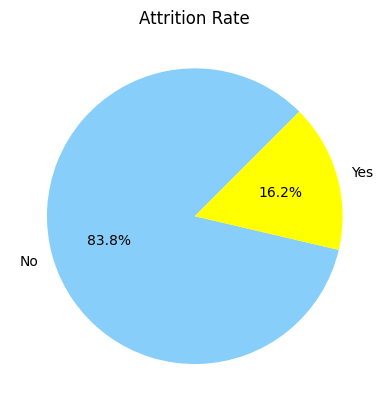

In [40]:
plt.pie(attrition_counts, labels=attrition_counts.index,autopct='%1.1f%%', startangle=45, colors=['lightskyblue','yellow'])
plt.title('Attrition Rate')
plt.show()

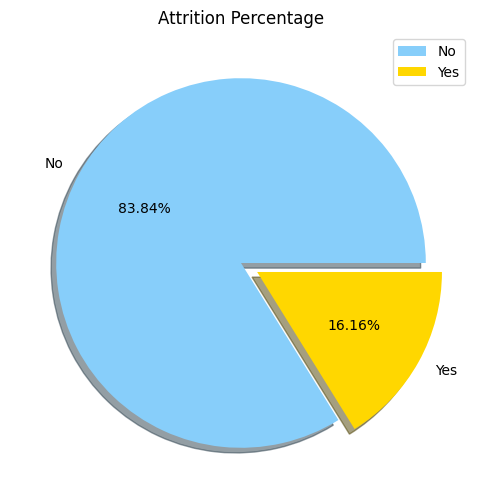

In [42]:
labels = df['Attrition'].value_counts().index
size = df['Attrition'].value_counts().values
plt.figure(figsize = (6,6))
plt.pie(size,colors = ['lightskyblue', 'gold'],explode = (0, 0.1), labels = labels,shadow = True,autopct = "%1.2f%%")
plt.title('Attrition Percentage')
plt.axis('off')
plt.legend()


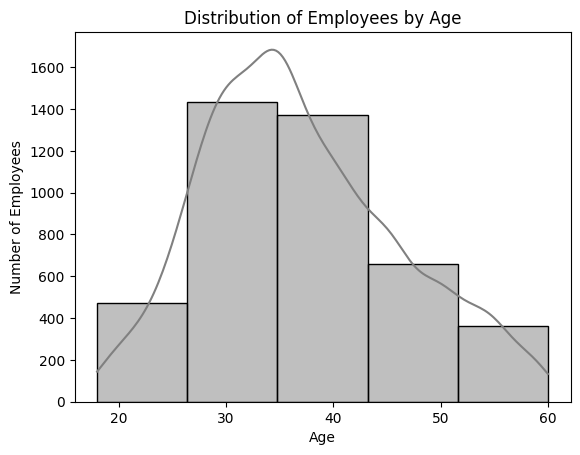

In [43]:
sns.histplot(data= df, x= 'Age', bins= 5, color= 'grey', kde=True)
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Age')
plt.show()


In [44]:
bins= [10,30,50,np.inf]
values= ['Young', 'Adult', 'Senile']
df['Age_category']= pd.cut(df['Age'], bins=bins,labels=values)

In [45]:
attrition_age=df.pivot_table(index='Age_category',columns='Attrition',values='EmployeeCount',aggfunc='count')
attrition_age

Attrition,No,Yes
Age_category,,
Young,840,290
Adult,2401,351
Senile,364,54


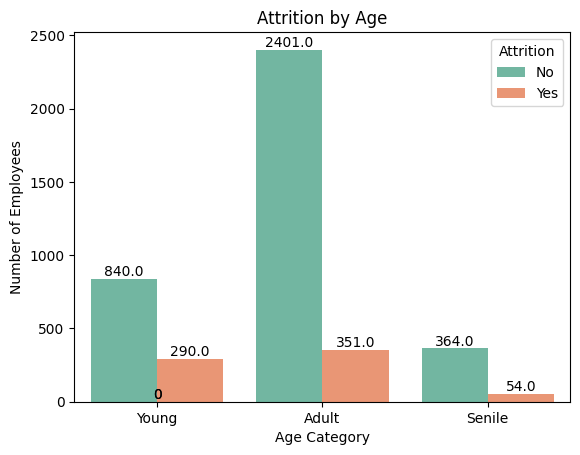

In [46]:
m=sns.countplot(data= df,x= 'Age_category', hue='Attrition',palette='Set2')
plt.xticks(rotation=0)
plt.xlabel('Age Category')
plt.ylabel('Number of Employees')
plt.title('Attrition by Age')
for p in m.patches:
 height = p.get_height()
 m.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
 ha='center', va='bottom', fontsize=10)
plt.show()

In [47]:
df['Department'].value_counts()

Department
Research & Development    2807
Sales                     1307
Human Resources            186
Name: count, dtype: int64

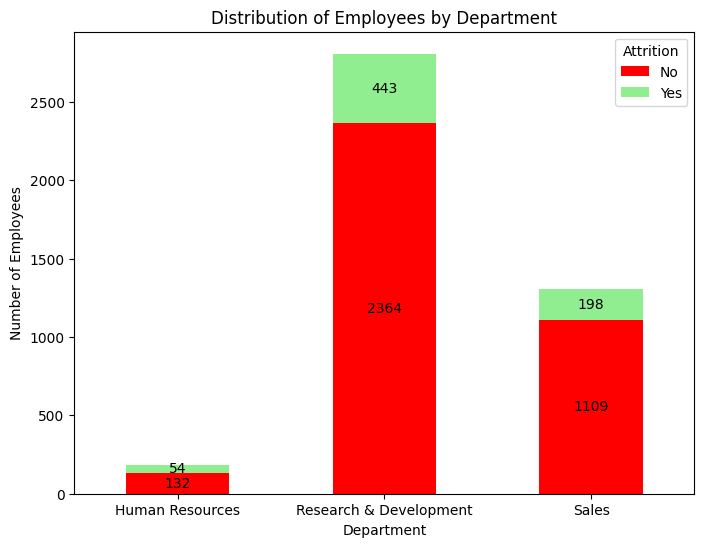

In [48]:
attrition_by_department = df.groupby(['Department', 'Attrition']).size().unstack()
ax = attrition_by_department.plot(kind='bar', stacked=True, figsize=(8, 6),color=['red','lightgreen'])
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=0)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employees by Department')
m.bar_label(m.containers[0], fontsize=10)
for p in ax.patches:
 width, height = p.get_width(), p.get_height()
 x, y = p.get_xy()
 ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')
plt.show()

In [49]:
department_groups = df.groupby('Department')
total_employees_by_department = department_groups.size().reset_index(name='TotalEmployees')
attrition_count_by_department = department_groups['Attrition'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='AttritionCount')
attrition_percentage_by_department = pd.merge(total_employees_by_department, attrition_count_by_department, on='Department')
attrition_percentage_by_department['AttritionPercentage'] = (attrition_percentage_by_department['AttritionCount'] / attrition_percentage_by_department['TotalEmployees']) * 100
print(attrition_percentage_by_department)


               Department  TotalEmployees  AttritionCount  AttritionPercentage
0         Human Resources             186              54            29.032258
1  Research & Development            2807             443            15.781974
2                   Sales            1307             198            15.149197


In [50]:
avg_income=df.groupby('Attrition')['MonthlyIncome'].mean()
avg_income

Attrition
No     65733.758669
Yes    61564.215827
Name: MonthlyIncome, dtype: float64

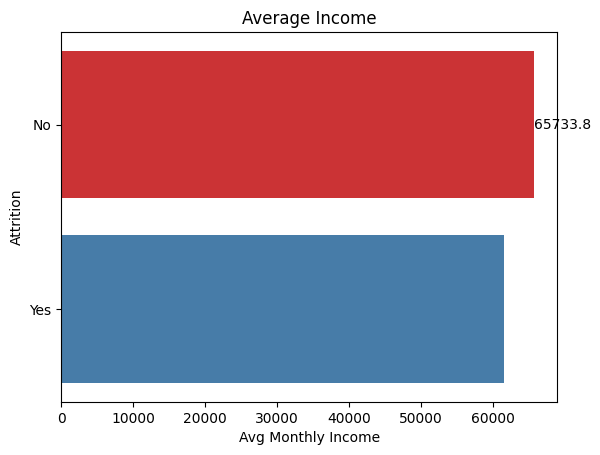

In [54]:
p=sns.barplot(y= avg_income.index, x=avg_income.values,errorbar=None,palette="Set1")
p.bar_label(p.containers[0], fontsize=10)
plt.title('Average Income')
plt.xlabel('Avg Monthly Income')
plt.show()

In [55]:
edu_dist=df['EducationField'].value_counts()
edu_dist

EducationField
Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

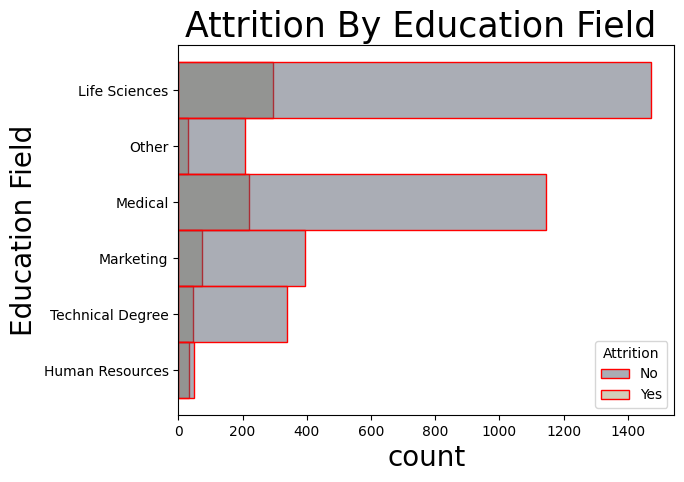

In [56]:
sns.histplot(hue='Attrition',y='EducationField',data=df,edgecolor='red',palette="cividis")
plt.ylabel('Education Field',fontsize=20)
plt.xlabel('count',fontsize=20)
plt.title('Attrition By Education Field ',fontsize=25)
plt.show

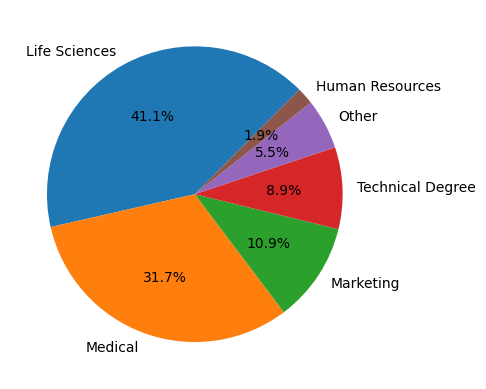

In [57]:
plt.pie(edu_dist, labels=edu_dist.index,autopct='%1.1f%%', startangle=45)
plt.show()

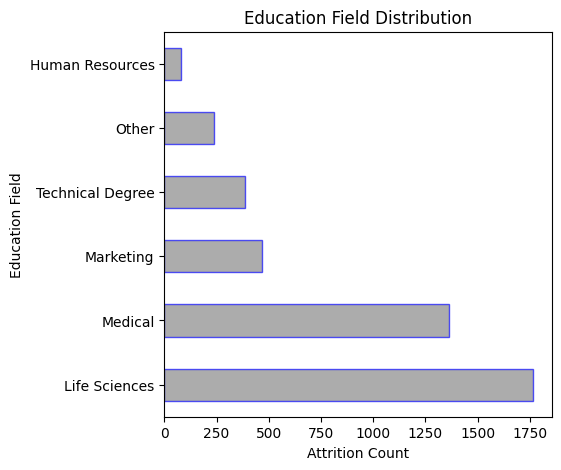

In [58]:
plt.figure(figsize=(5,5))
df.EducationField.value_counts().plot(kind='barh',edgecolor='blue',color='grey',alpha=.65)
plt.title("Education Field Distribution")
plt.ylabel("Education Field")
plt.xlabel("Attrition Count")
plt.show()


In [59]:
avg_distance=df.groupby('Attrition')['DistanceFromHome'].mean()
avg_distance

Attrition
No     9.227462
Yes    9.044604
Name: DistanceFromHome, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

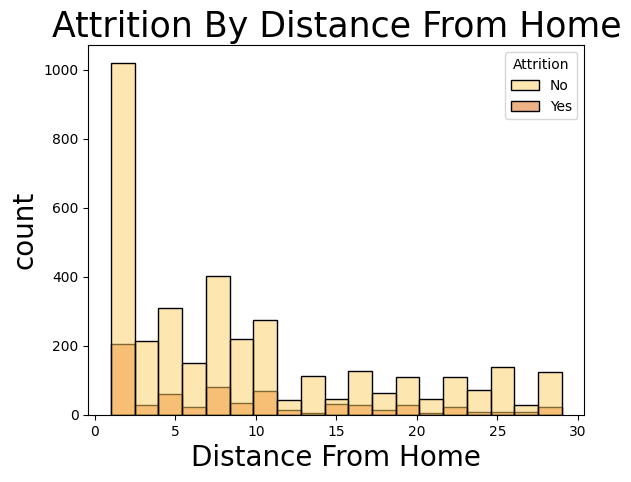

In [60]:
sns.histplot(hue='Attrition', data=df,x='DistanceFromHome',palette="YlOrBr")
plt.xlabel('Distance From Home', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Attrition By Distance From Home',fontsize=25)
plt.show

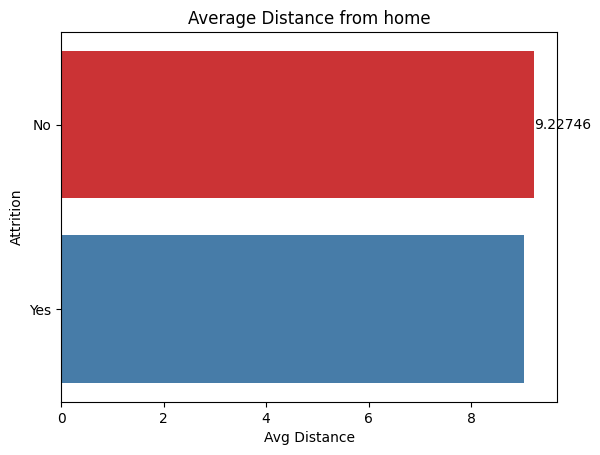

In [62]:
p=sns.barplot(y= avg_distance.index, x=avg_distance.values,errorbar=None,palette="Set1")
p.bar_label(p.containers[0], fontsize=10)
plt.title('Average Distance from home')
plt.xlabel('Avg Distance')
plt.show()

In [63]:
gend_dist=df['Gender'].value_counts()
gend_dist

Gender
Male      2571
Female    1729
Name: count, dtype: int64

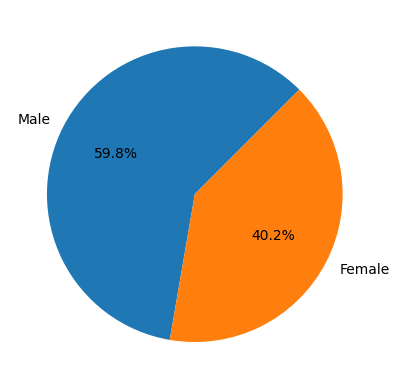

In [64]:
plt.pie(gend_dist, labels=gend_dist.index,autopct='%1.1f%%', startangle=45)
plt.show()

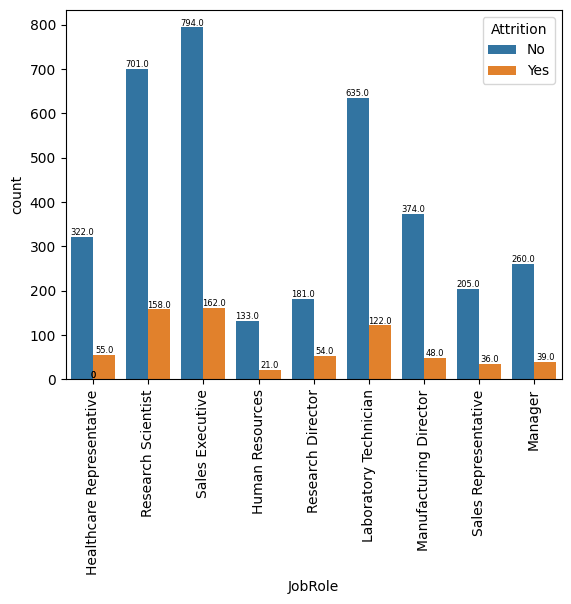

In [65]:
jp=sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=90)
for p in jp.patches:
    height = p.get_height()
    jp.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=6)
plt.show()

In [66]:
df1= df[df['WorkLifeBalance']==1]

In [67]:
att_cnt=df1['Attrition'].value_counts()
att_cnt

Attrition
No     163
Yes     73
Name: count, dtype: int64

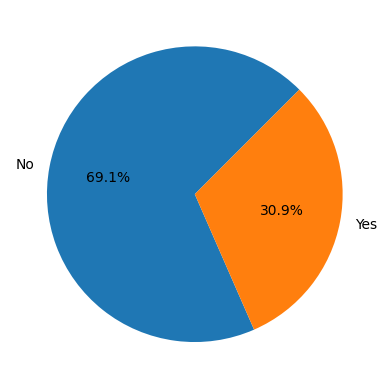

In [68]:
plt.pie(att_cnt, labels=att_cnt.index,autopct='%1.1f%%', startangle=45)
plt.show()

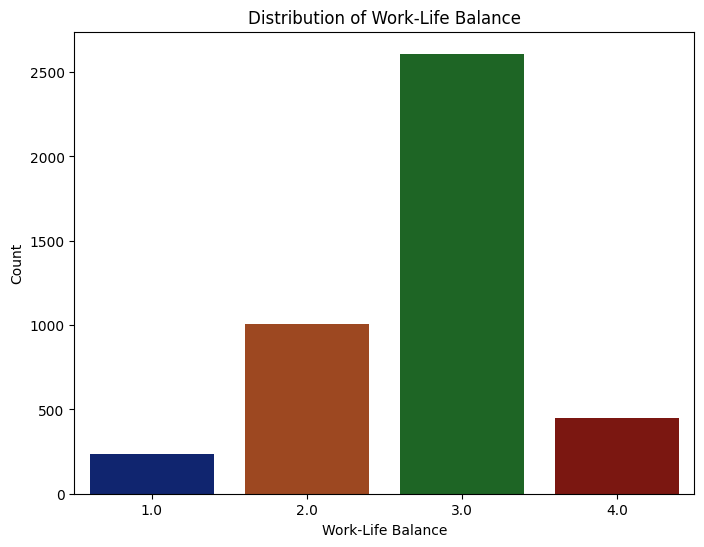

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='WorkLifeBalance', palette='dark')
plt.title('Distribution of Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

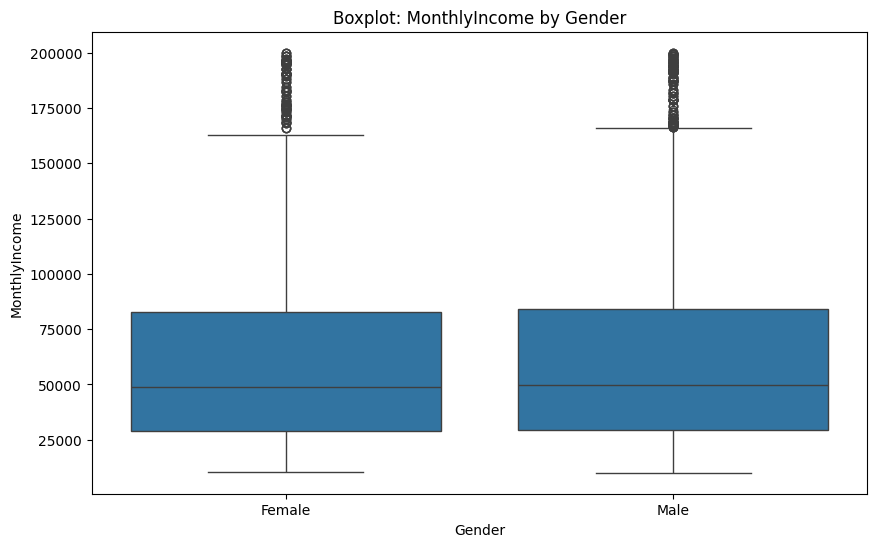

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)
plt.title('Boxplot: MonthlyIncome by Gender')
plt.show()

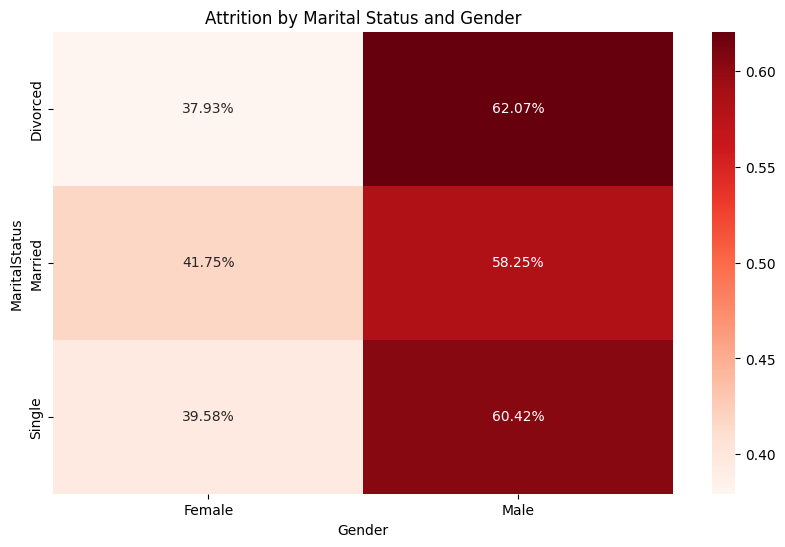

In [74]:
cross_tab = pd.crosstab(df['MaritalStatus'], df['Gender'], values=df['Attrition'], aggfunc='count', normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='Reds', fmt=".2%", cbar=True)
plt.title('Attrition by Marital Status and Gender')
plt.show()